In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poralikha","key":"79169b3029d199799a5ee16330f777e3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           1976        191  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data               763KB  2023-11-21 17:56:32           8875        153  1.0              
everydaycodings/produce-prices-dataset                              Fruits and Vegetables Prices Dataset        232KB  2023-12-11 13:40:33           1471         30  1.0              
thedevastator/books-sales-and-ratings                               Books Sales 

In [5]:
!kaggle datasets download -d vikasukani/parkinsons-disease-data-set

  0% 0.00/15.6k [00:00<?, ?B/s]
100% 15.6k/15.6k [00:00<00:00, 5.93MB/s]


In [6]:
!mkdir parkinsons

In [7]:
!unzip parkinsons-disease-data-set.zip -d parkinsons

Archive:  parkinsons-disease-data-set.zip
  inflating: parkinsons/parkinsons.data  


In [8]:
cd/content/parkinsons/

/content/parkinsons


In [ ]:
#Dataset_1

In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [10]:
df=pd.read_csv('parkinsons.data')
print(df.shape,'\n')
df.head()# Hyperparameter Optimization for Logistic Regression Algorithms

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
'''
To use columns of  df more efficiently following are some changes I have done
    a. pushing target column i.e 'status' to last column
    b. converting all column names in lower case
    c. replacing spaces in column names with '_'
    d. replacing ':' in column names with '_'
    e. replacing '(' in column names with '_'
    f. replacing ')' in column names with '' i.e blank
    g. replacing '%' in column names with 'in_percent'
'''

df = df.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = df.pop(targetCol)                                     # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

# to check the above printing top 5 rows
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [12]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [14]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [15]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
# checking skewness of the data
df.skew().sort_values(ascending=False)

<ipython-input-17-1701f675ac80>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

<ipython-input-18-98d5dedb3587>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


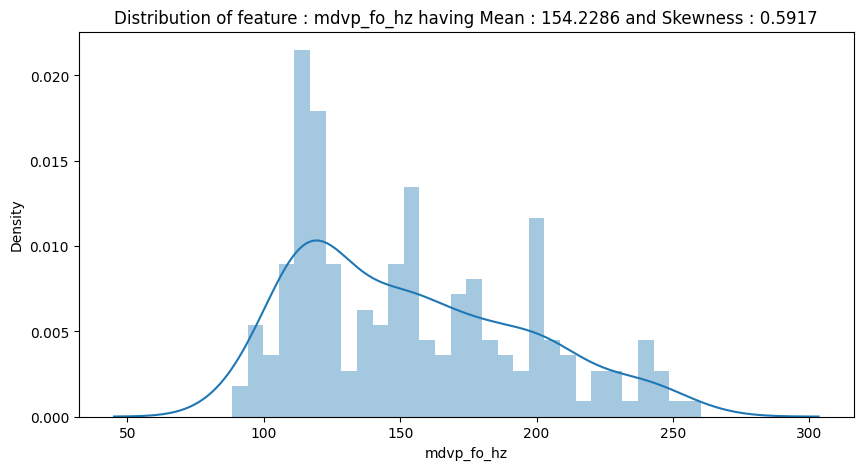

In [18]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-19-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-19-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

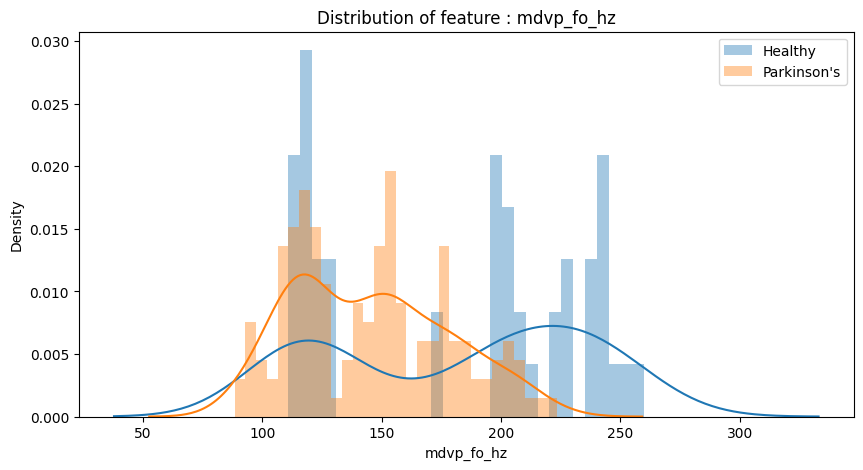

In [19]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

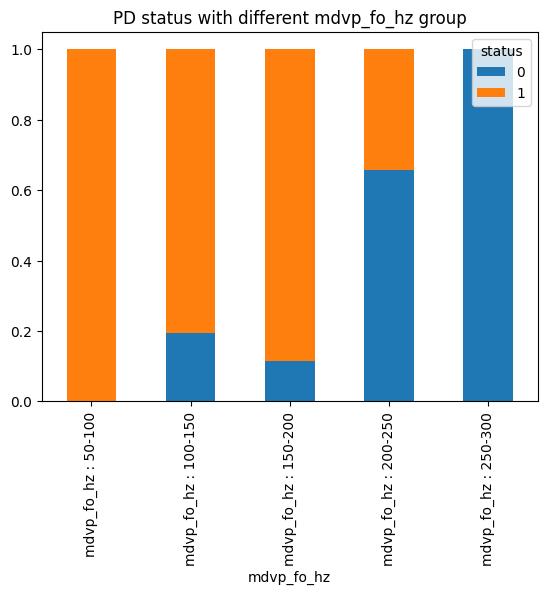

In [20]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(df.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")

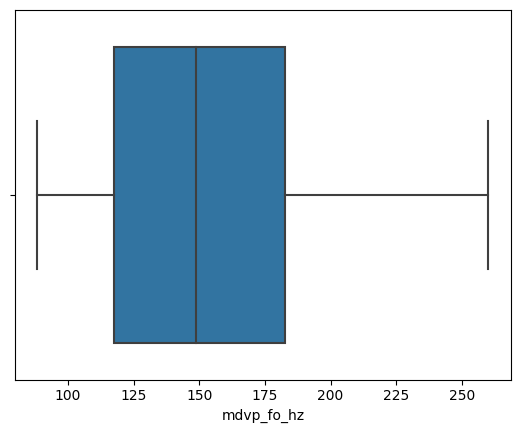

In [21]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

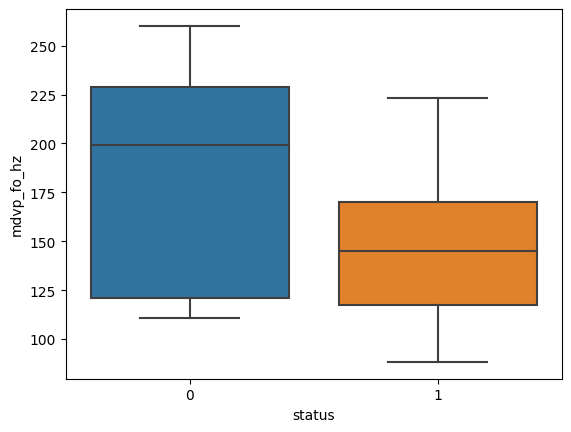

In [22]:
sns.boxplot(x=df['status'],y=df[feature])

<ipython-input-23-65b1859eab6b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


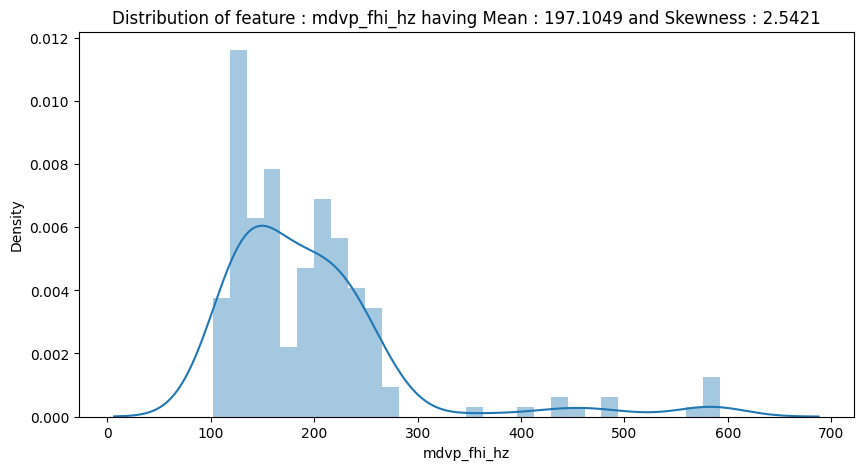

In [23]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-24-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-24-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

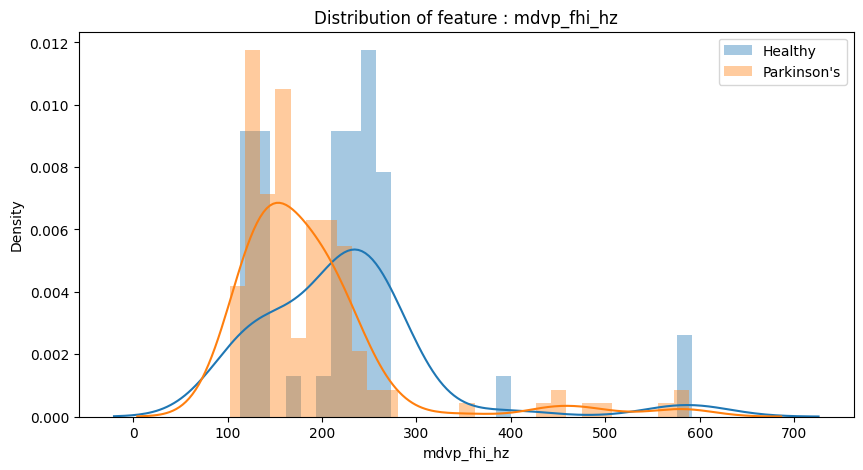

In [24]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

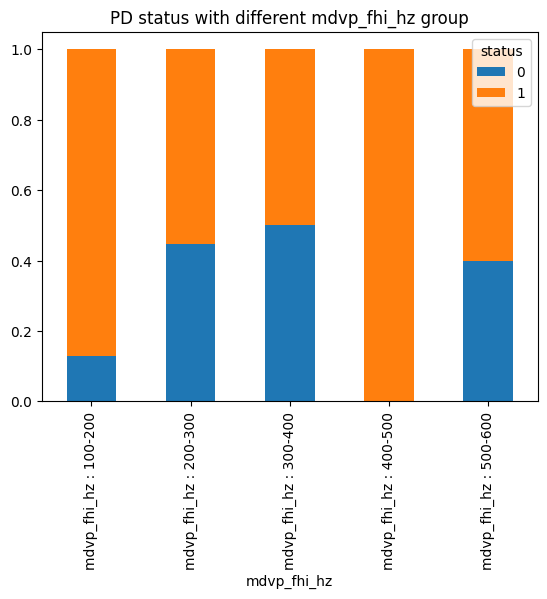

In [25]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(df[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group")

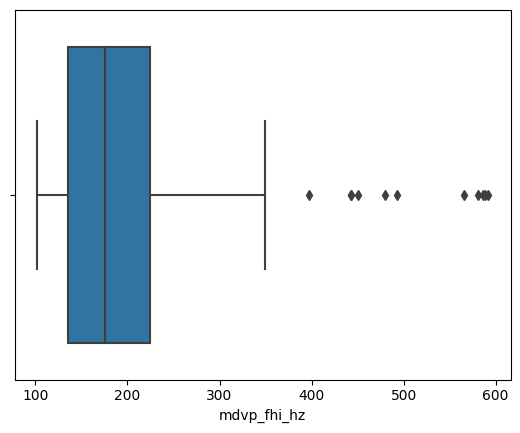

In [26]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

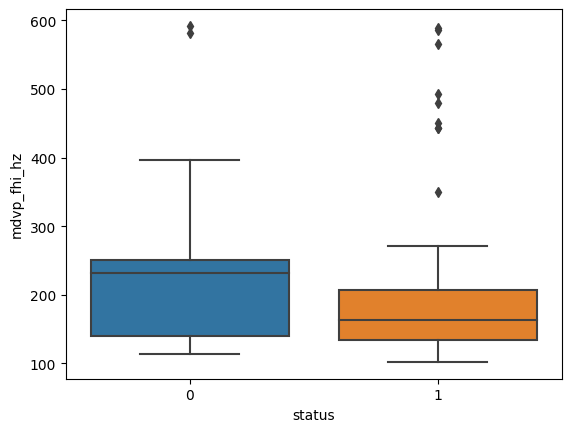

In [27]:
sns.boxplot(x=df['status'],y=df[feature])

In [28]:
Q1 = df[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = df[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) |(df[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(df[feature]),3),round(np.median(df[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/df[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


<ipython-input-29-3d6c7748b9ef>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


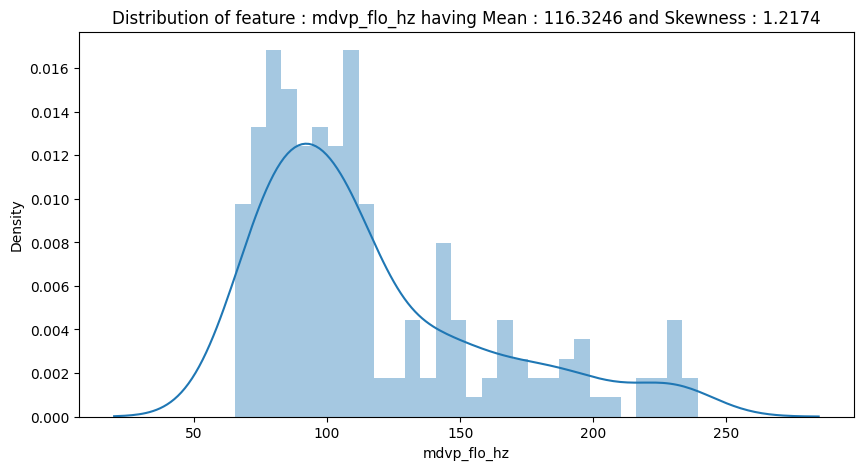

In [29]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-30-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-30-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

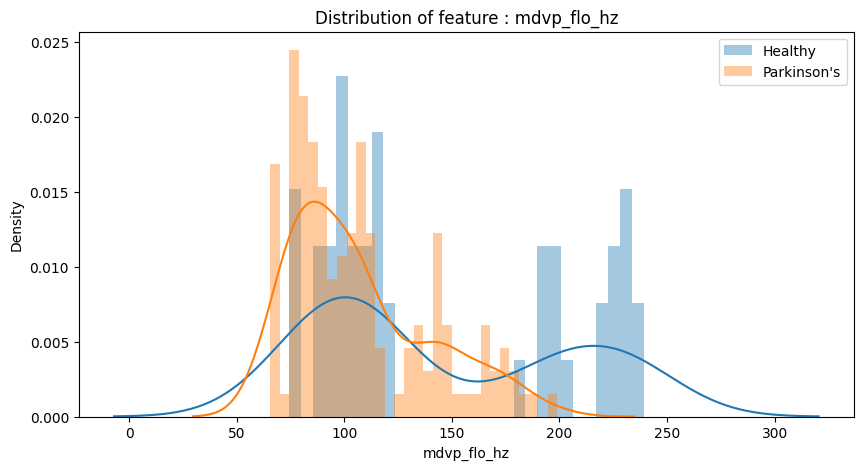

In [30]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

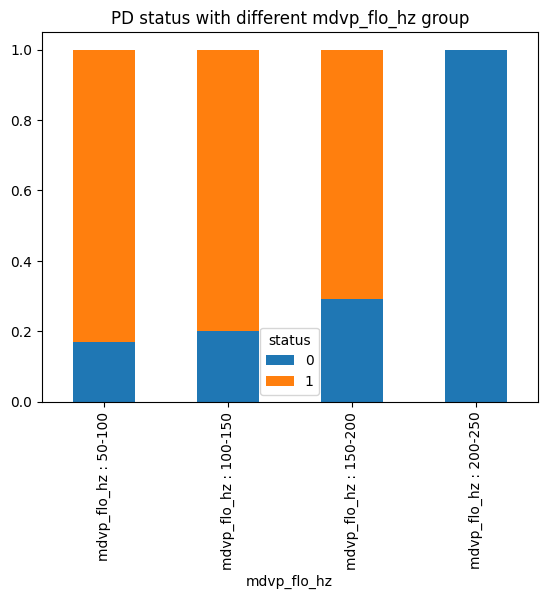

In [31]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(df[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")

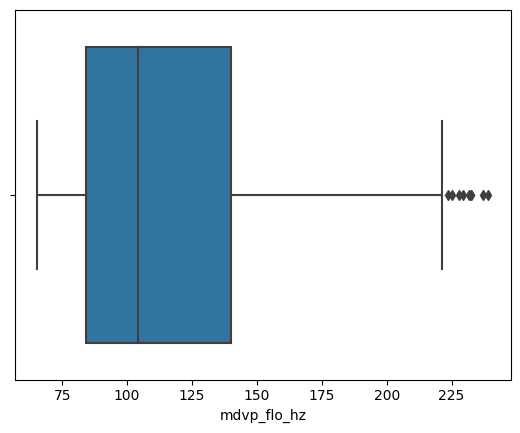

In [32]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

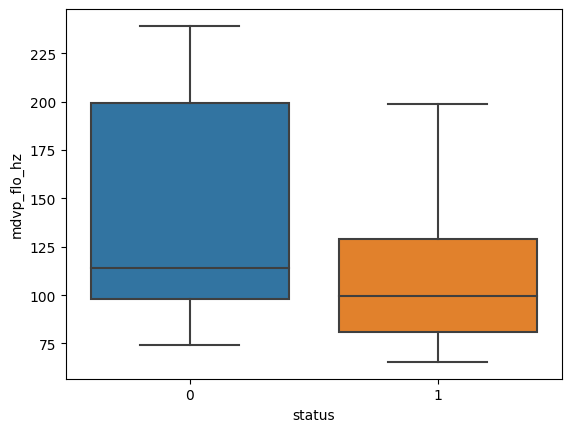

In [33]:
sns.boxplot(x=df['status'],y=df[feature])

In [34]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df

1    147
0     48
Name: status, dtype: int64

In [35]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

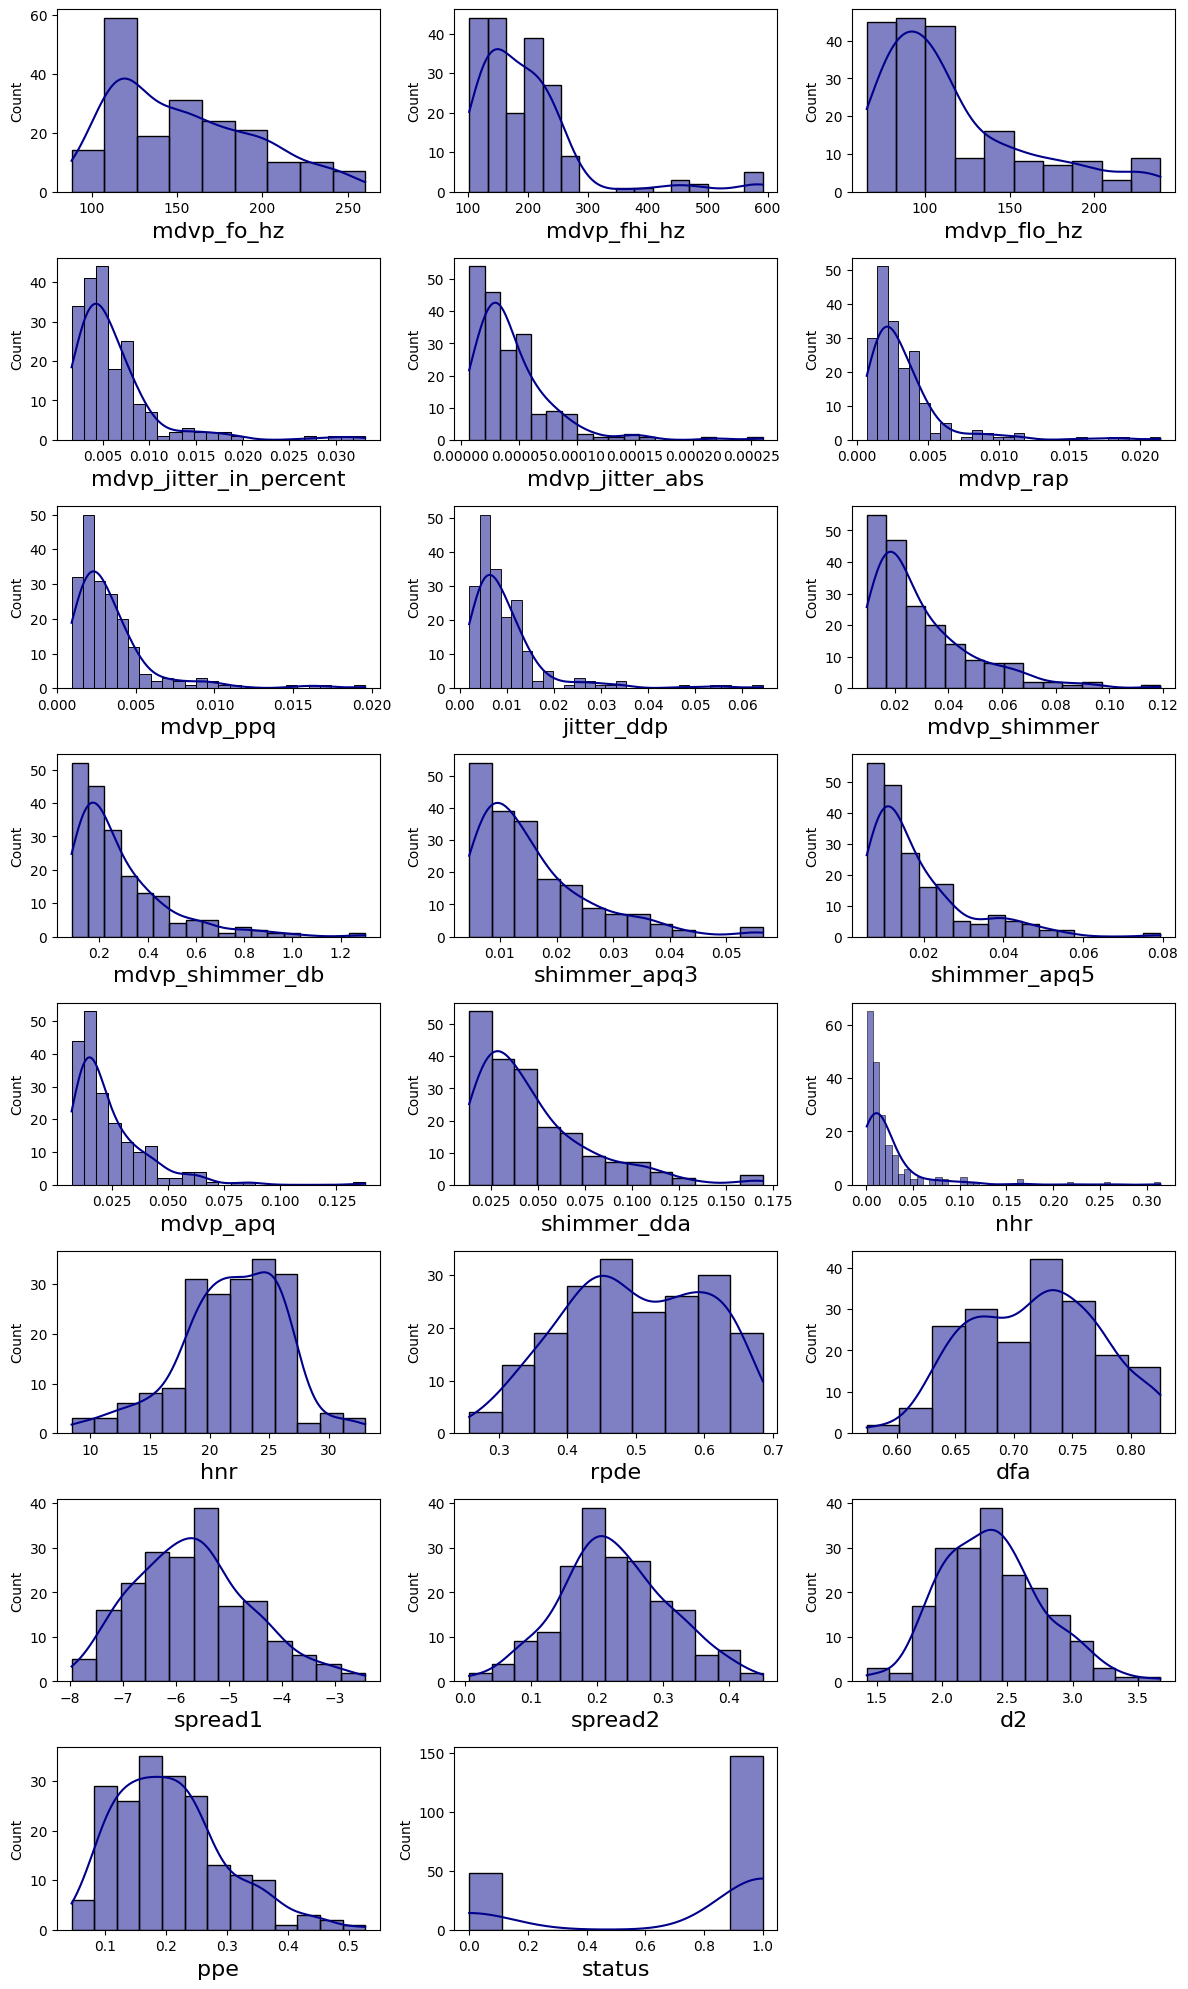

In [36]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

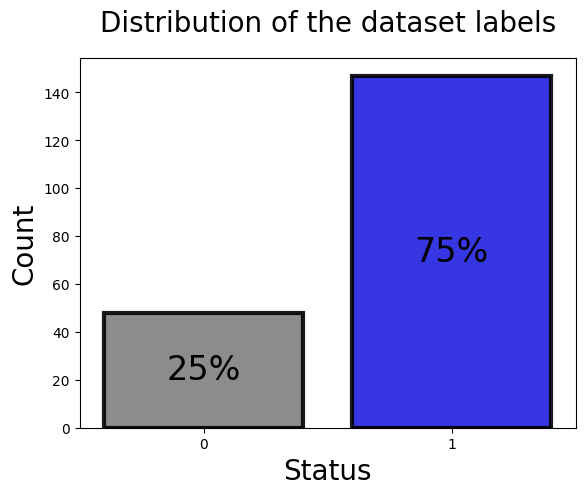

In [37]:
fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20, fontfamily='Book Antiqua')
fig.set_ylabel('Count', fontsize=20, fontfamily='Book Antiqua')

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20, fontfamily='Book Antiqua')
plt.show()

<ipython-input-38-9e4b9cd1aefc>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=cmap)


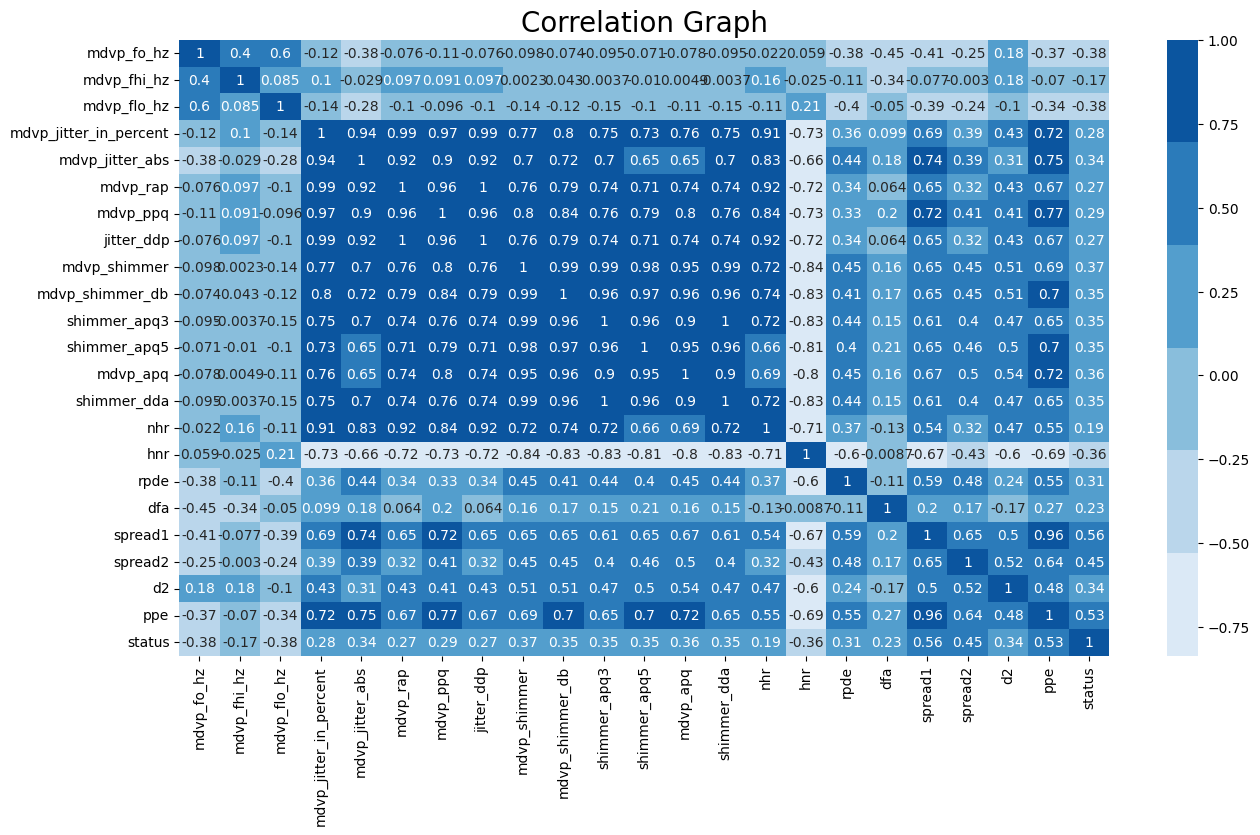

In [38]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(df.corr(), annot=True, cmap=cmap)

plt.show()

In [39]:
correlation = df.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

<ipython-input-39-48c108062036>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [40]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,rpde
status,0.308567
spread1,0.591117
ppe,0.545886
spread2,0.479905
mdvp_shimmer,0.447424
mdvp_apq,0.451379
shimmer_apq5,0.399903
mdvp_shimmer_db,0.410684
shimmer_apq3,0.435242
shimmer_dda,0.435237


<ipython-input-41-3b6be81cce92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['status'][:-1].sort_values().plot(kind='bar')


<Axes: >

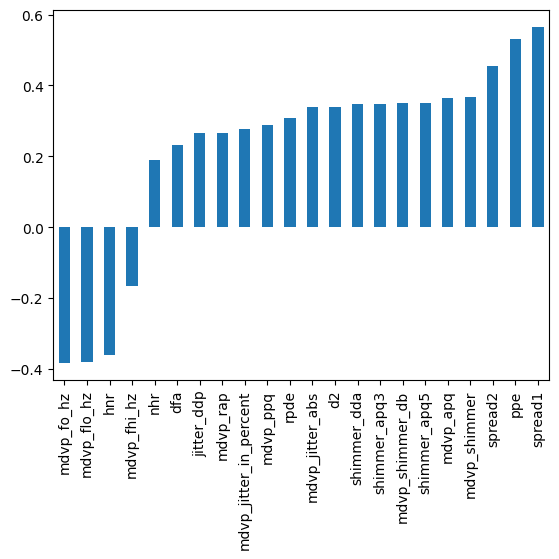

In [41]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

In [42]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]

In [43]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [45]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


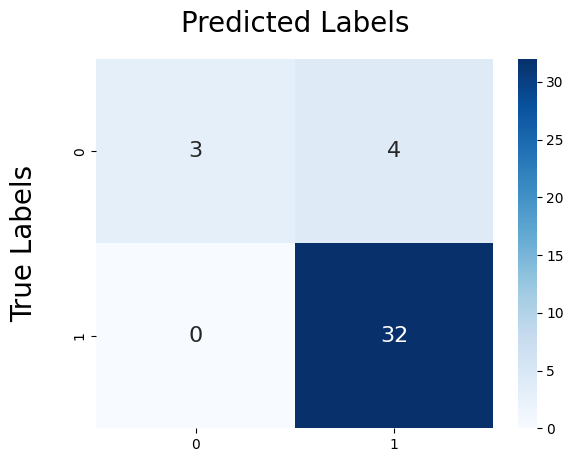

--------------------------------------------------------------------------------


In [46]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

In [47]:
cm=confusion_matrix(y_test,y_pred_LR)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[0,1]
FP=cm[1,0]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [48]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8974358974358975 
 The Missclassification = 1-Accuracy =  0.10256410256410253 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8888888888888888 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.42857142857142855 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11111111111111116


<ipython-input-48-1084d782beed>:13: RuntimeWarning: divide by zero encountered in double_scalars
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


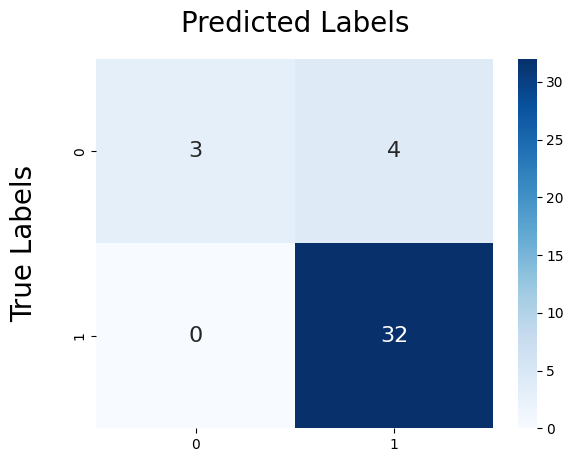

--------------------------------------------------------------------------------


In [49]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 89.83
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 93.75
 • Recall Score is : 93.75
 • F1-Score Score is : 93.75
--------------------------------------------------------------------------------


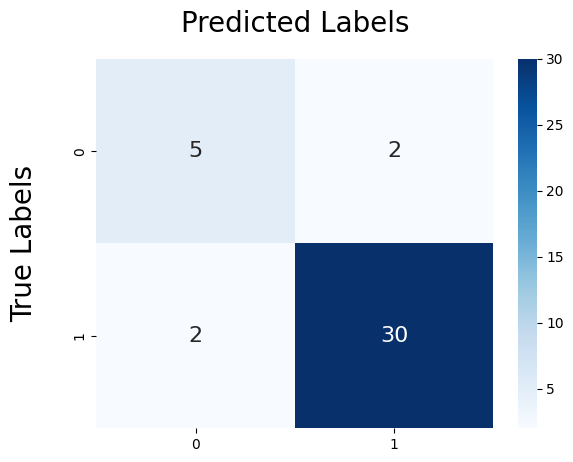

--------------------------------------------------------------------------------


DECISION TREE :


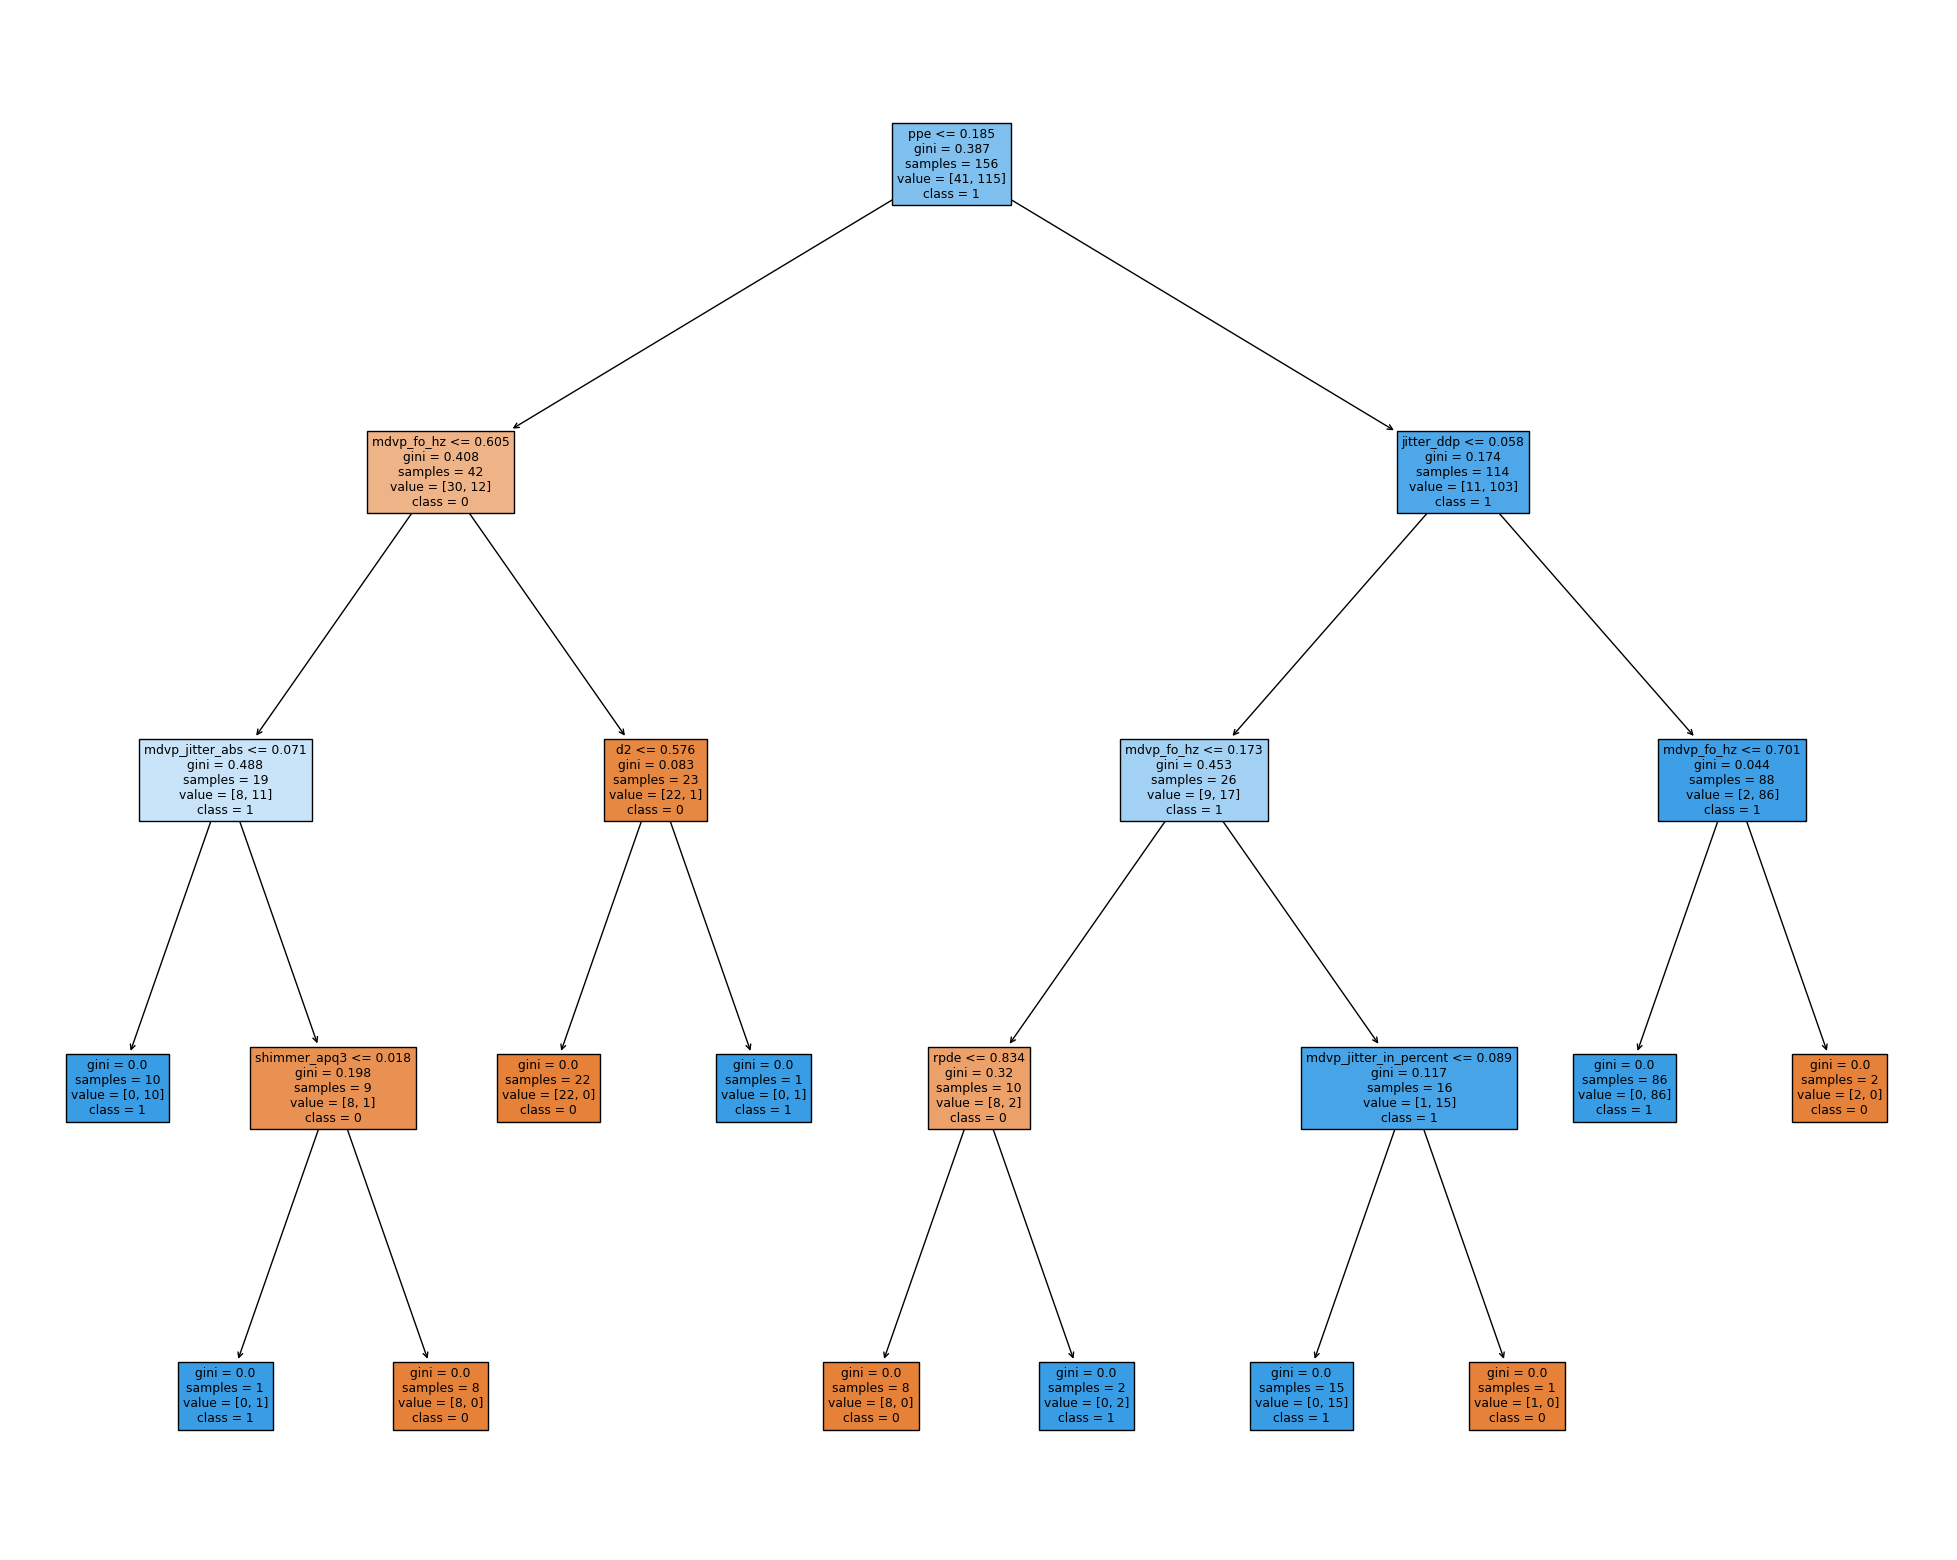

In [50]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [51]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

In [52]:
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [53]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [54]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
best_dt, best_dt_hyperparams

(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0),
 {'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.92
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


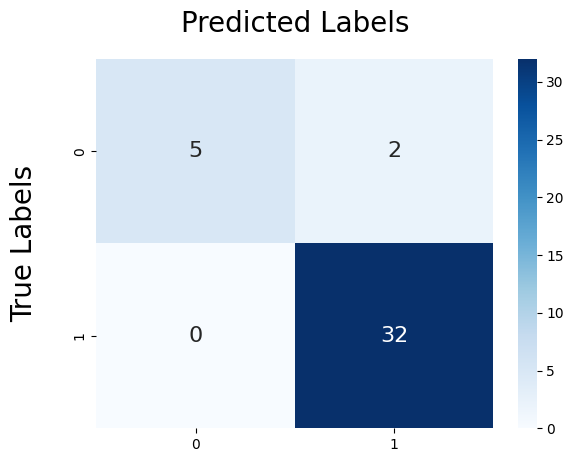

--------------------------------------------------------------------------------


In [55]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


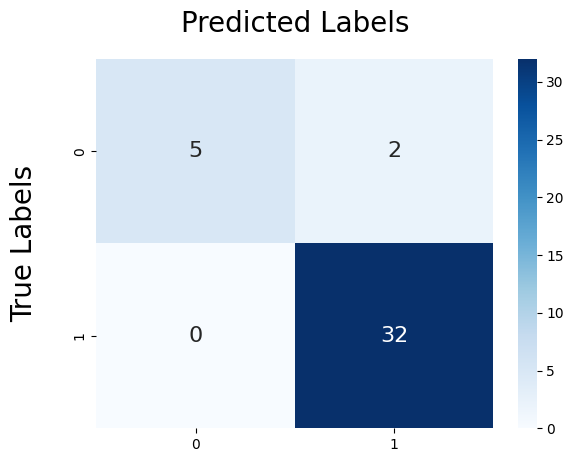

--------------------------------------------------------------------------------


In [56]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })


# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)


Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


In [58]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},

    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},

    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},

    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)},

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},

]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


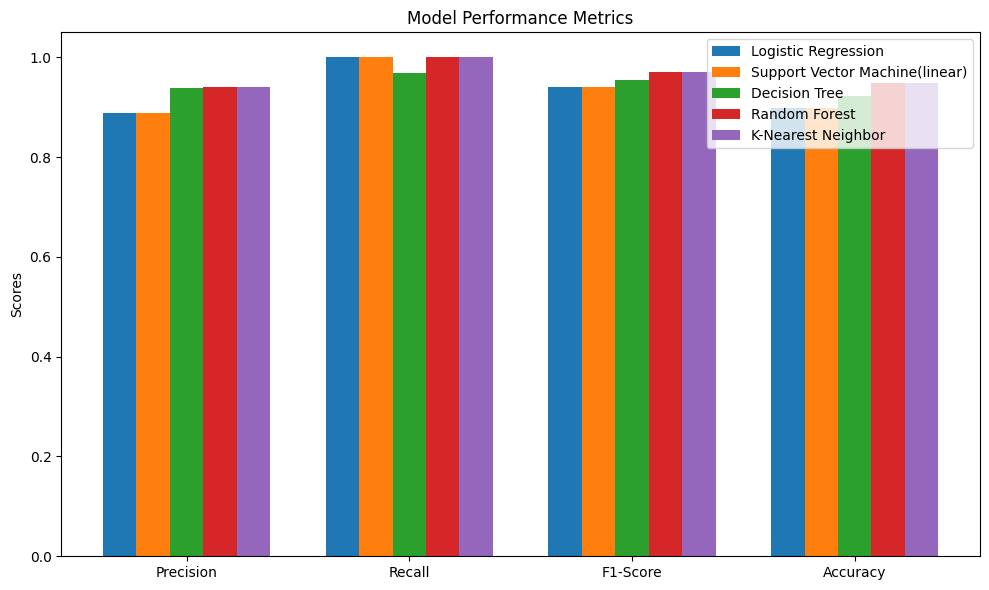

In [59]:
# Your result data
data = [
    {'Model': 'Logistic Regression', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Decision Tree', 'Precision': 0.939394, 'Recall': 0.968750, 'F1-Score': 0.953846, 'Accuracy': 0.923077},
    {'Model': 'Random Forest', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [60]:
model = Sequential()

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [62]:
model.fit(x=X_train_scaled,y=y_train, validation_data=(X_test_scaled, y_test), batch_size=100, epochs=1000, callbacks=[cb])

Epoch 1/1000
2/2 [==============================] - 3s 749ms/step - loss: 0.7839 - val_loss: 0.7860
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7813 - val_loss: 0.7751
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7536 - val_loss: 0.7651
Epoch 4/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.7339 - val_loss: 0.7558
Epoch 5/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.7488 - val_loss: 0.7472
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.7341 - val_loss: 0.7391
Epoch 7/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.7335 - val_loss: 0.7312
Epoch 8/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.7266 - val_loss: 0.7236
Epoch 9/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.7096 - val_loss: 0.7162
Epoch 10/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7171 - val_loss: 0.7090
Epoch 11

In [63]:
losses = pd.DataFrame(model.history.history)

<Axes: >

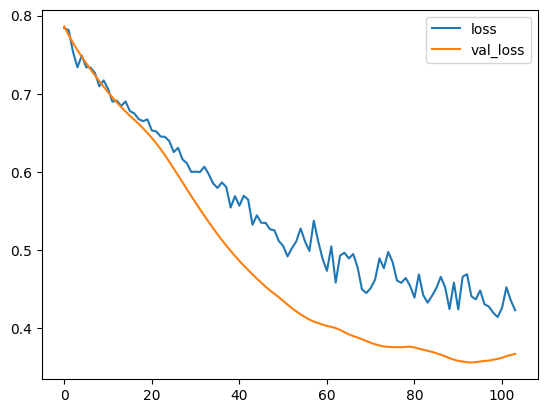

In [64]:
losses.plot()

In [65]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

2/2 [==============================] - 0s 7ms/step


In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [67]:
print(confusion_matrix(y_test,predictions))

[[ 3  4]
 [ 2 30]]


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [69]:
print(accuracy_score(y_test,predictions))

0.8461538461538461


In [ ]:
#Dataset_2

In [70]:
#  install necessary packages ( install first time only )
# !pip install numpy pandas sklearn xgboost --upgrade

In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
# os packages
import os, sys

In [73]:
#  let’s read the data into a DataFrame

df = pd.read_csv('parkinsons.data')
df.tail() # shows the last 5 rows

# head() <= Use for first 5 rows

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [74]:
# descrive the data

df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [75]:
#  To know how many rows and cols and NA values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [76]:
#  shape of the dataset

df.shape

(195, 24)

In [77]:
#  get the all features except "status"

features = df.loc[:, df.columns != 'status'].values[:, 1:] # values use for array format



# get status values in array format

labels = df.loc[:, 'status'].values

In [78]:
# to know how many values for 1 and how many for 0 labeled status

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [79]:
#  import MinMaxScaler class from sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler

In [80]:
#  Initialize MinMax Scaler classs for -1 to 1

scaler = MinMaxScaler((-1, 1))

# fit_transform() method fits to the data and
# then transforms it.

X = scaler.fit_transform(features)
y = labels

#  Show X and y  here
# print(X, y)

In [81]:
#  import train_test_split from sklearn.

from sklearn.model_selection import train_test_split

In [82]:
# split the dataset into training and testing sets with 20% of testings

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.15)

In [83]:
# Load an XGBClassifier and train the model

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [84]:
# make a instance and fitting the model

model = XGBClassifier()
model.fit(x_train, y_train) # fit with x and y train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
#  Finnaly pridict the model

y_prediction = model.predict(x_test)

print("Accuracy Score is", accuracy_score(y_test, y_prediction) * 100)

Accuracy Score is 93.33333333333333
